<a href="https://colab.research.google.com/github/amaljithpapi/Project/blob/main/Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Andhra_Health_Data.csv')
# Check the first few rows
df.head()

,Sno,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,06-08-2013 00:00,07-09-2013 00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,08-08-2013 00:00,09-09-2013 00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,22-03-2017 20:25,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,15-08-2013 00:00,18-10-2013 00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,24-08-2013 00:00,27-09-2013 00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,22-03-2017 20:25,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,31-08-2013 00:00,02-10-2013 00:00,NO,NaN,D


# Exploratory Data Analysis

In [3]:
# Check the shape of the dataset
print(df.shape)

(479688, 23)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Sno               479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

In [5]:
df.columns

Index(['Sno', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [6]:
df.dtypes

,0
Sno,int64
AGE,int64
SEX,object
CASTE_NAME,object
CATEGORY_CODE,object
CATEGORY_NAME,object
SURGERY_CODE,object
SURGERY,object
VILLAGE,object
MANDAL_NAME,object


In [7]:
df.describe()

,Sno,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.0000,479688.000000,479688.000000,479688.000000
mean,239844.5000,44.912264,30428.941698,27652.205861
std,138474.1423,18.961084,27441.592281,25951.706037
min,1.0000,0.000000,5.000000,2.000000
25%,119922.7500,34.000000,12500.000000,12500.000000
50%,239844.5000,47.000000,25000.000000,23200.000000
75%,359766.2500,59.000000,35000.000000,30600.000000
max,479688.0000,107.000000,520000.000000,520000.000000


In [8]:
# Description of categorical variables
df.describe(include=object)

,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,CLAIM_DATE,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
count,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,479688,475128,479688,10122,479688
unique,6,6,29,29,925,923,11801,711,13,246084,4870,467,2,20,937,918,2,740,4
top,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-1,Visakhapatnam,East Godavari,27-12-2016 14:01,27-12-2017 21:43,Sri Venkateswara Institute Of Medical Sciences,C,Guntur,13-02-2017 00:00,29-05-2017 00:00,NO,04-01-2017 00:00,D
freq,260718,246164,74947,74947,65378,65378,3277,9264,55398,35,511,21854,369346,60988,1602,1764,469566,40,437948


In [9]:
df.drop(columns= ['Sno','CASTE_NAME', 'SURGERY_CODE','VILLAGE','MANDAL_NAME','CATEGORY_CODE','SURGERY_DATE', 'HOSP_NAME','HOSP_DISTRICT', 'SRC_REGISTRATION'] ,inplace=True)

In [10]:
df.head()

,AGE,SEX,CATEGORY_NAME,SURGERY,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_TYPE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE
0,56,Female,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,03-08-2013 20:38,12500,22-03-2017 20:25,11000,G,07-09-2013 00:00,NO,NaN
1,37,Male,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,06-08-2013 07:26,12500,22-03-2017 20:25,11000,G,09-09-2013 00:00,NO,NaN
2,50,Male,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,09-08-2013 18:30,12500,22-03-2017 20:25,11500,G,18-10-2013 00:00,NO,NaN
3,45,Male,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,24-08-2013 19:37,12500,22-03-2017 20:25,11000,G,27-09-2013 00:00,NO,NaN
4,54,Male,NEPHROLOGY,Maintenance Hemodialysis For Crf,Srikakulam,28-08-2013 17:03,12500,22-03-2017 20:25,11000,G,02-10-2013 00:00,NO,NaN


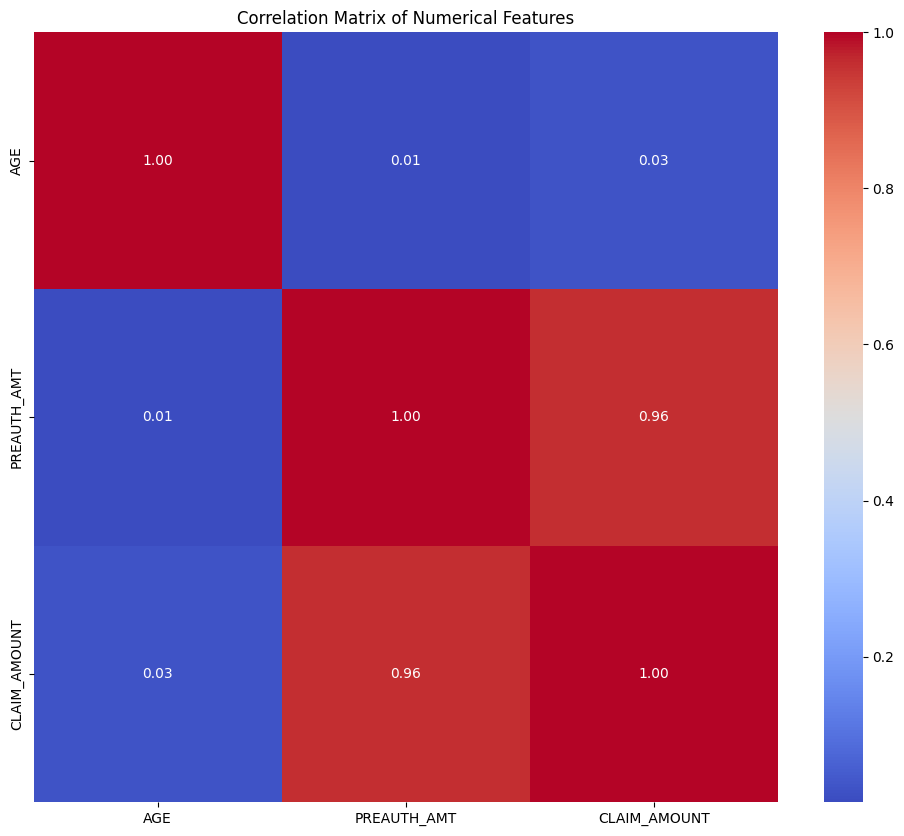

In [11]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
# Find unique values in each variable
df.nunique()

,0
AGE,102
SEX,6
CATEGORY_NAME,29
SURGERY,923
DISTRICT_NAME,13
PREAUTH_DATE,246084
PREAUTH_AMT,2007
CLAIM_DATE,4870
CLAIM_AMOUNT,11465
HOSP_TYPE,2


In [13]:
# display unique values in sex

print(df['SEX'].unique())

['Female' 'Male' 'Male(Child)' 'Female(Child)' 'FEMALE' 'MALE']


In [14]:
# Replace values
df.SEX=df.SEX.replace(['Female', 'Female(Child)'], 'FEMALE')
df.SEX=df.SEX.replace(['Male', 'Male(Child)'], 'MALE')

In [15]:
print(df['SEX'].unique())

['FEMALE' 'MALE']


In [16]:
#rename the column Mortality Y / N to Mortality

df.rename(columns={'Mortality Y / N': 'Mortality'}, inplace=True)

<Axes: title={'center': 'Surgery Category'}, xlabel='CATEGORY_NAME'>

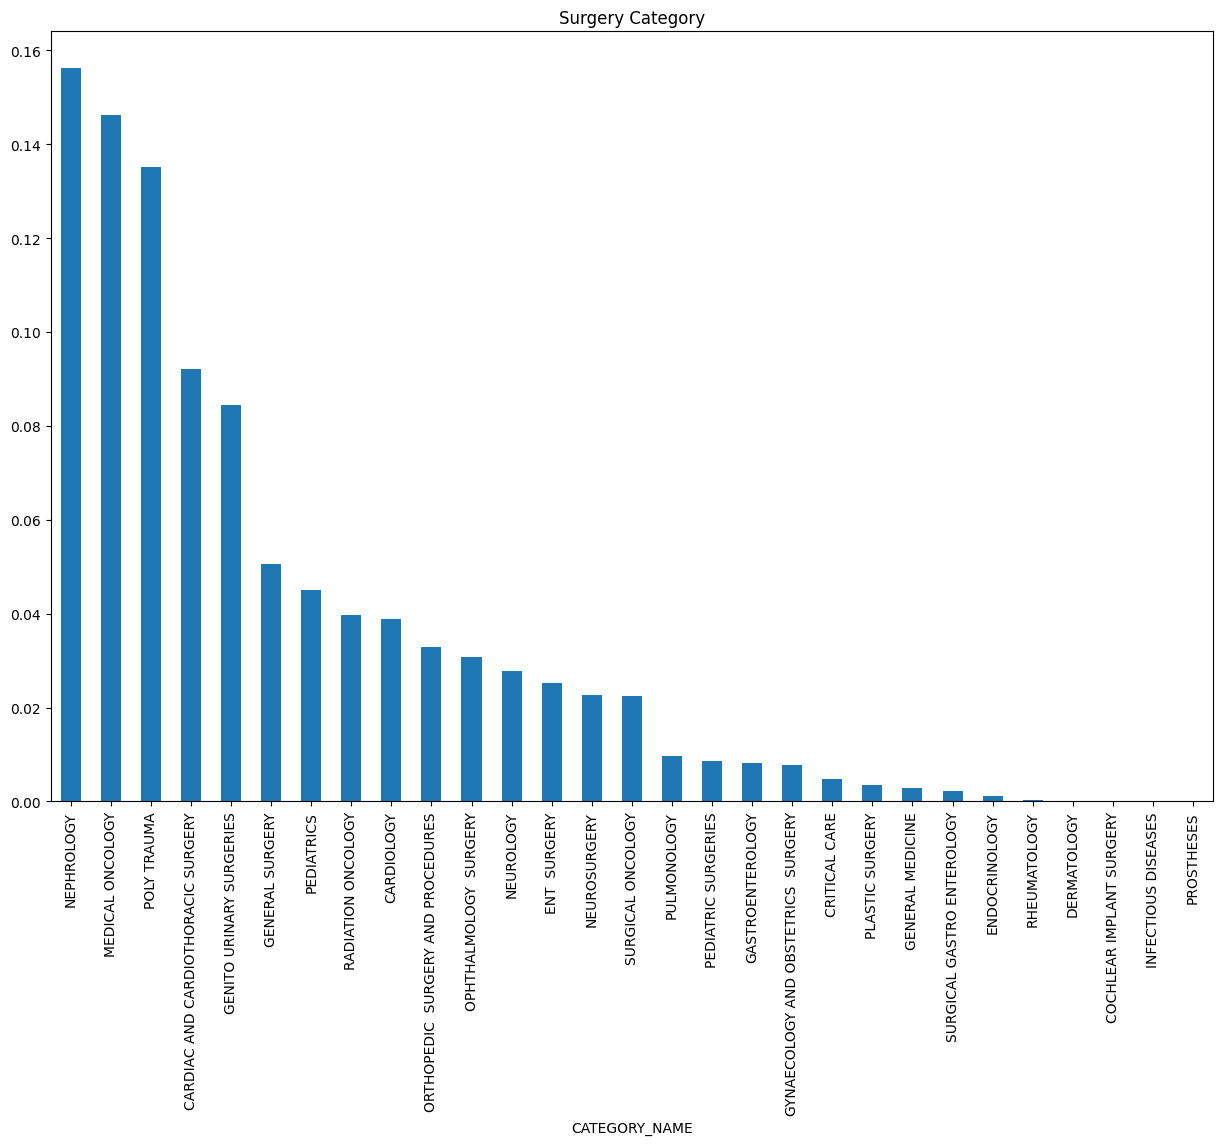

In [17]:
#Surgery Category
fig = plt.gcf()
fig.set_size_inches(15,10)
df['CATEGORY_NAME'].value_counts(normalize=True).plot.bar(title='Surgery Category')

<Axes: title={'center': 'Surgeries with Most Death'}, xlabel='SURGERY'>

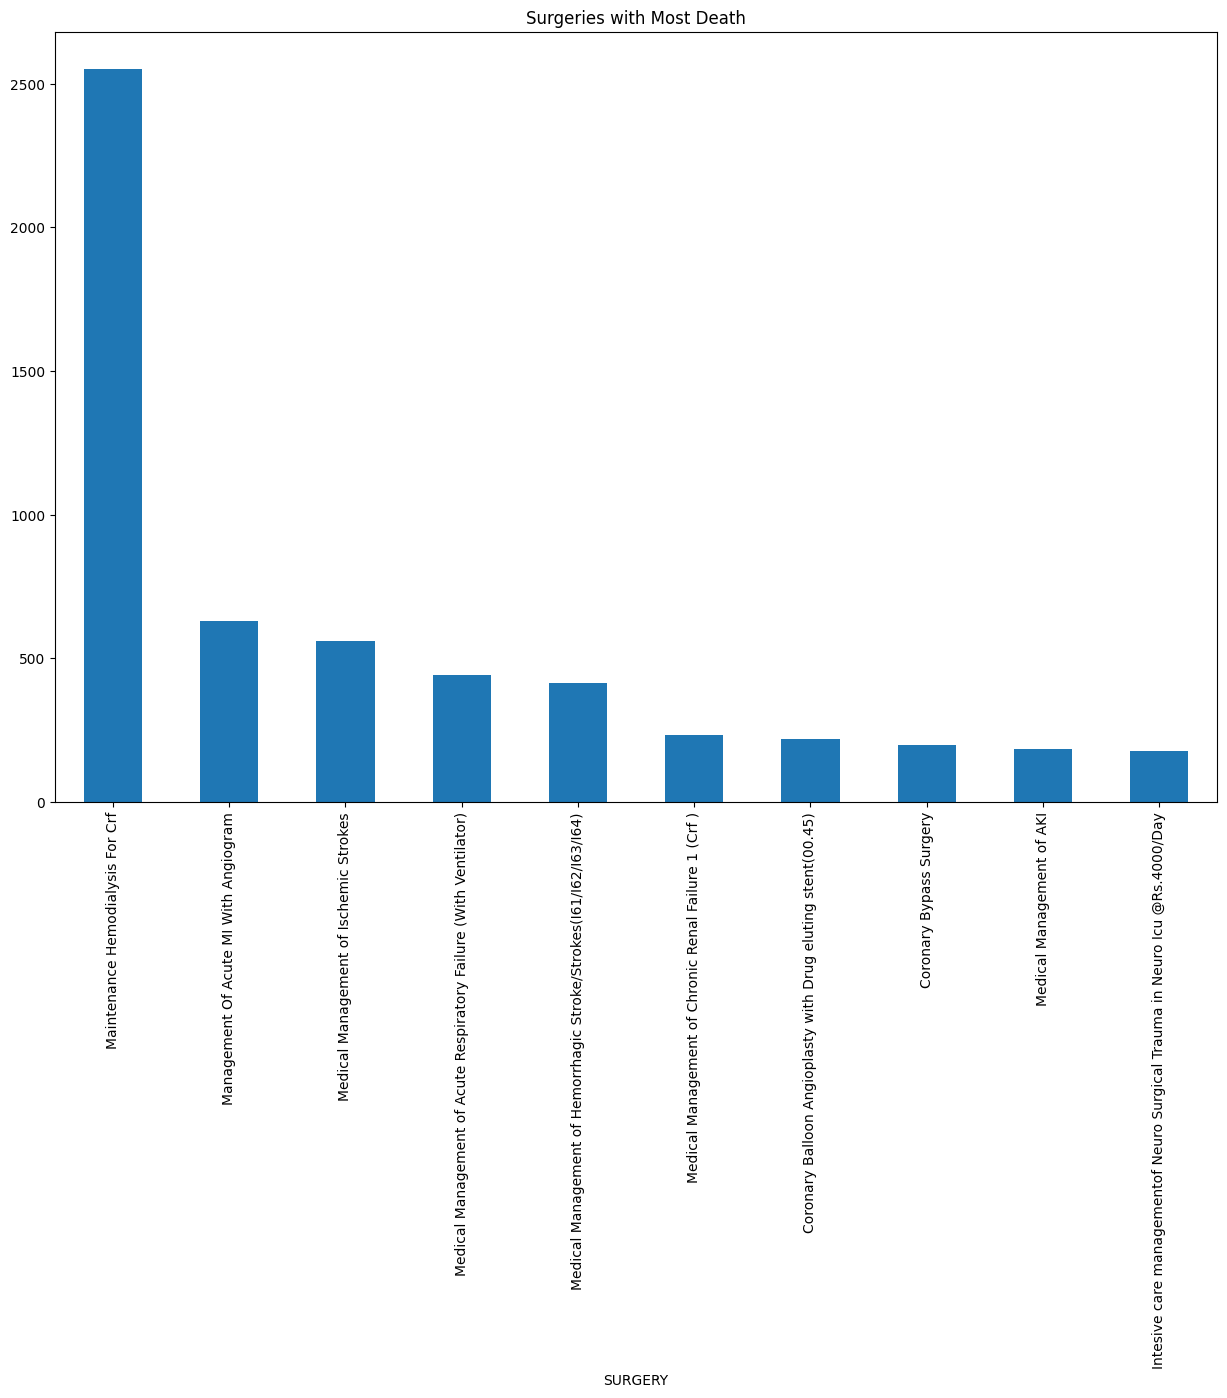

In [18]:
#Surgeries types with Most Death

fig = plt.gcf()
fig.set_size_inches(15,10)
Death = pd.crosstab(df['SURGERY'],df['Mortality'])
Death.sort_values(by=['YES'],ascending=False)[:10]['YES'].plot.bar(title= 'Surgeries with Most Death')

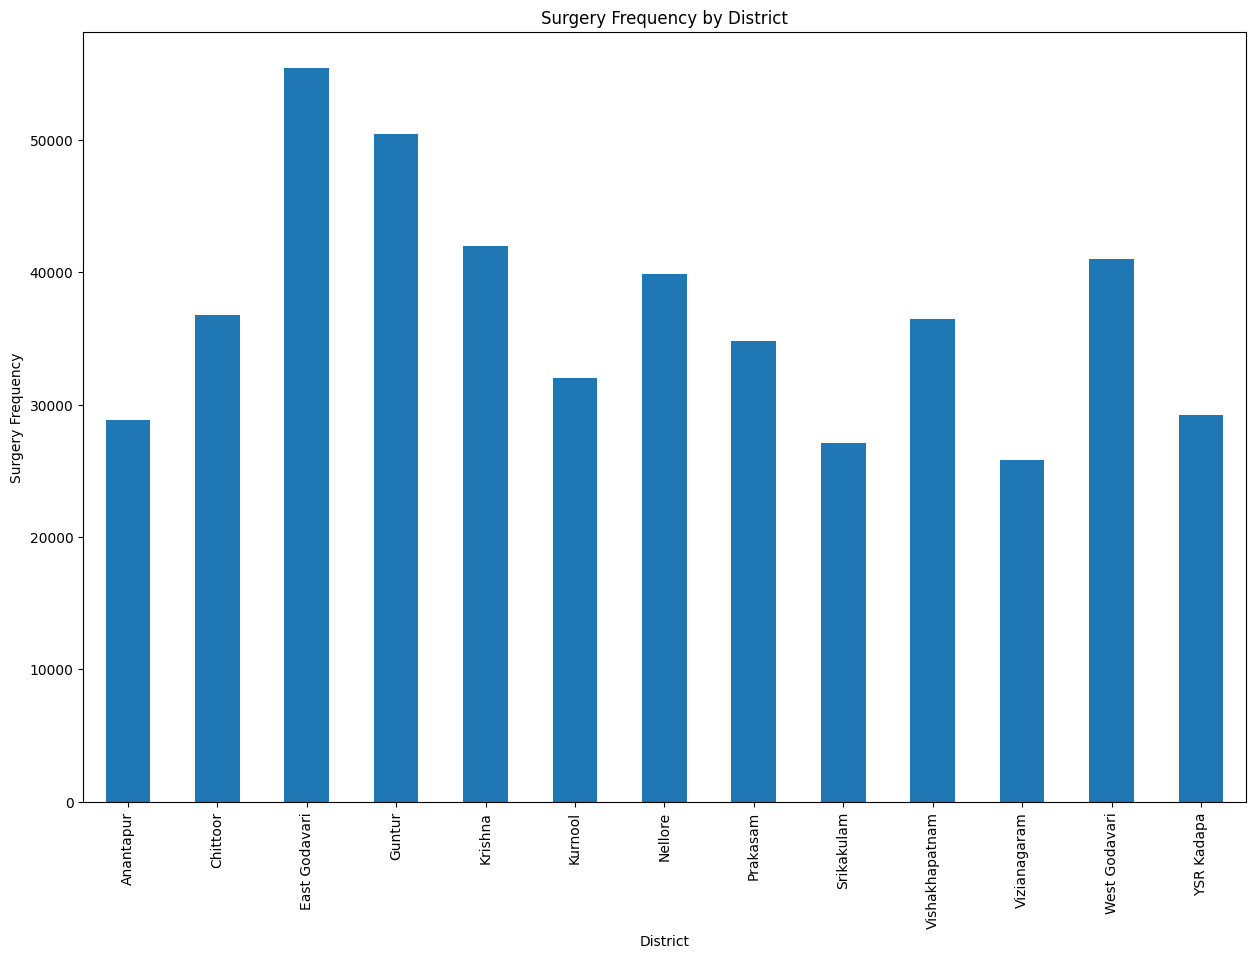

In [19]:
# Surgeries Frequency by District
fig = plt.gcf()
fig.set_size_inches(15, 10)
df.groupby('DISTRICT_NAME')['SURGERY'].count().plot.bar(title='Surgery Frequency by District')
plt.xlabel('District')
plt.ylabel('Surgery Frequency')
plt.show()

# Preprocessing

In [20]:
df.drop(columns=['SURGERY'],inplace=True)
df.drop(columns=['DISTRICT_NAME'],inplace=True)

In [21]:
# Fill values of MORTALITY_DATE to the DISCHARGE_DATE column
df['DISCHARGE_DATE'].fillna(df['MORTALITY_DATE'],inplace=True)

<ipython-input-21-c57c87c0eb53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DISCHARGE_DATE'].fillna(df['MORTALITY_DATE'],inplace=True)


The "MORTALITY_DATE" column might contain information related to the death, it assumes that the death date and discharge date is same, and combining these dates into the "DISCHARGE_DATE" column could help consolidate relevant information in a single column.

In [22]:
# Convert date into YYYY-MM-DD format
def clean(x):
    return x[0:10]
df['PREAUTH_DATE']=df['PREAUTH_DATE'].apply(clean)

In [23]:
def clean(x):
    return x[0:10]
df['CLAIM_DATE']=df['CLAIM_DATE'].apply(clean)

Convert date strings in the "PREAUTH_DATE" and "CLAIM_DATE" columns from the "YYYY-MM-DD HH:MM" format to the "YYYY-MM-DD" format

In [24]:
df.head()

,AGE,SEX,CATEGORY_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_TYPE,DISCHARGE_DATE,Mortality,MORTALITY_DATE
0,56,FEMALE,NEPHROLOGY,03-08-2013,12500,22-03-2017,11000,G,07-09-2013 00:00,NO,NaN
1,37,MALE,NEPHROLOGY,06-08-2013,12500,22-03-2017,11000,G,09-09-2013 00:00,NO,NaN
2,50,MALE,NEPHROLOGY,09-08-2013,12500,22-03-2017,11500,G,18-10-2013 00:00,NO,NaN
3,45,MALE,NEPHROLOGY,24-08-2013,12500,22-03-2017,11000,G,27-09-2013 00:00,NO,NaN
4,54,MALE,NEPHROLOGY,28-08-2013,12500,22-03-2017,11000,G,02-10-2013 00:00,NO,NaN


In [25]:
##changing to date time

df['DISCHARGE_DATE'] = pd.to_datetime(df['DISCHARGE_DATE'], format='%d-%m-%Y %H:%M', errors='coerce')
df['PREAUTH_DATE'] = pd.to_datetime(df['PREAUTH_DATE'], format='%d-%m-%Y', errors='coerce')
df['CLAIM_DATE'] = pd.to_datetime(df['PREAUTH_DATE'], format='%d-%m-%Y', errors='coerce')
# Remove time information from 'DISCHARGE_DATE'
df['DISCHARGE_DATE'] = df['DISCHARGE_DATE'].dt.floor('d')

## creating a new column days_stayed
df['DAYS_STAYED'] = (df['DISCHARGE_DATE'] - df['PREAUTH_DATE']).dt.days

df.head(20)

,AGE,SEX,CATEGORY_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_TYPE,DISCHARGE_DATE,Mortality,MORTALITY_DATE,DAYS_STAYED
0,56,FEMALE,NEPHROLOGY,2013-08-03,12500,2013-08-03,11000,G,2013-09-07,NO,NaN,35.0
1,37,MALE,NEPHROLOGY,2013-08-06,12500,2013-08-06,11000,G,2013-09-09,NO,NaN,34.0
2,50,MALE,NEPHROLOGY,2013-08-09,12500,2013-08-09,11500,G,2013-10-18,NO,NaN,70.0
3,45,MALE,NEPHROLOGY,2013-08-24,12500,2013-08-24,11000,G,2013-09-27,NO,NaN,34.0
4,54,MALE,NEPHROLOGY,2013-08-28,12500,2013-08-28,11000,G,2013-10-02,NO,NaN,35.0
5,35,MALE,NEPHROLOGY,2013-08-28,12500,2013-08-28,11000,G,2013-10-02,NO,NaN,35.0
6,52,MALE,NEPHROLOGY,2013-08-30,12500,2013-08-30,11000,G,2013-10-02,NO,NaN,33.0
7,73,MALE,NEPHROLOGY,2014-05-02,12500,2014-05-02,5000,C,2014-05-23,YES,23-05-2014 00:00,21.0
8,56,MALE,CARDIAC AND CARDIOTHORACIC SURGERY,2014-06-10,40000,2014-06-10,40000,C,2014-06-16,NO,NaN,6.0
9,49,MALE,CARDIAC AND CARDIOTHORACIC SURGERY,2014-06-11,115846,2014-06-11,115846,C,2014-06-25,NO,NaN,14.0


In [26]:
df.dtypes

,0
AGE,int64
SEX,object
CATEGORY_NAME,object
PREAUTH_DATE,datetime64[ns]
PREAUTH_AMT,int64
CLAIM_DATE,datetime64[ns]
CLAIM_AMOUNT,int64
HOSP_TYPE,object
DISCHARGE_DATE,datetime64[ns]
Mortality,object


In [27]:
# Check null values
df.isnull().sum()

,0
AGE,0
SEX,0
CATEGORY_NAME,0
PREAUTH_DATE,0
PREAUTH_AMT,0
CLAIM_DATE,0
CLAIM_AMOUNT,0
HOSP_TYPE,0
DISCHARGE_DATE,3
Mortality,0


creating new column "Days Stayed" using the date values in column PREAUTH_DATE and DISCHARGE_DATE.

In [28]:
# Now convert to Int64
df['DAYS_STAYED'] = df['DAYS_STAYED'].astype('Int64')

In [29]:
df.drop(columns=['MORTALITY_DATE'],inplace=True)
df.drop(columns=['DISCHARGE_DATE'],inplace=True)
df.drop(columns=['PREAUTH_DATE'],inplace=True)
df.drop(columns=['CLAIM_DATE'],inplace=True)

In [30]:
df.head()

,AGE,SEX,CATEGORY_NAME,PREAUTH_AMT,CLAIM_AMOUNT,HOSP_TYPE,Mortality,DAYS_STAYED
0,56,FEMALE,NEPHROLOGY,12500,11000,G,NO,35
1,37,MALE,NEPHROLOGY,12500,11000,G,NO,34
2,50,MALE,NEPHROLOGY,12500,11500,G,NO,70
3,45,MALE,NEPHROLOGY,12500,11000,G,NO,34
4,54,MALE,NEPHROLOGY,12500,11000,G,NO,35


In [31]:
df.dtypes

,0
AGE,int64
SEX,object
CATEGORY_NAME,object
PREAUTH_AMT,int64
CLAIM_AMOUNT,int64
HOSP_TYPE,object
Mortality,object
DAYS_STAYED,Int64


In [32]:
# Select numeric columns
df_numeric=df.select_dtypes(include=np.number)
# Check skewness of numeric values
df_numeric.skew()

,0
AGE,-0.574233
PREAUTH_AMT,2.826157
CLAIM_AMOUNT,3.089832
DAYS_STAYED,6.69312


AGE: -0.574233 A negative coefficient for the 'AGE' feature suggests an inverse relationship with the target variable (or the outcome being predicted). In this context, it implies that as the age increases, the predicted outcome decreases. This could mean that, according to the model, younger individuals may be associated with higher predicted outcomes compared to older individuals.

PREAUTH_AMT: 2.826157 A positive coefficient for 'PREAUTH_AMT' indicates a positive relationship with the target variable. In this case, as the 'PREAUTH_AMT' increases, the predicted outcome is expected to increase as well. This suggests that higher pre-authorization amounts are associated with higher predicted outcomes according to the model.

CLAIM_AMOUNT: 3.089832 Similar to 'PREAUTH_AMT', the positive coefficient for 'CLAIM_AMOUNT' suggests a positive relationship with the target variable. As the 'CLAIM_AMOUNT' increases, the predicted outcome is expected to increase. This implies that higher claim amounts are associated with higher predicted outcomes according to the model.

DAYS_STAYED: 6.69508 The positive coefficient for 'DAYS_STAYED' implies a positive relationship with the target variable. As the number of days stayed increases, the predicted outcome is expected to increase as well. This suggests that a longer duration of stay is associated with higher predicted outcomes according to the model.

In [33]:
df.corr(numeric_only=True)

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED
AGE,1.000000,0.013485,0.032526,0.043084
PREAUTH_AMT,0.013485,1.000000,0.959587,-0.036834
CLAIM_AMOUNT,0.032526,0.959587,1.000000,-0.024458
DAYS_STAYED,0.043084,-0.036834,-0.024458,1.000000


AGE and PREAUTH_AMT (0.013485): The correlation coefficient is close to zero, suggesting a very weak positive correlation between age and pre-authorization amount. In practical terms, age has little influence on pre-authorization amount.

AGE and CLAIM_AMOUNT (0.032526): Similarly, there is a very weak positive correlation between age and claim amount. Age has a minor influence on the claimed amount.

AGE and DAYS_STAYED (0.042833): There is a weak positive correlation between age and the number of days stayed. This suggests that, on average, older individuals might have slightly longer stays.

PREAUTH_AMT and CLAIM_AMOUNT (0.959587): There is a strong positive correlation between pre-authorization amount and claimed amount. This indicates that higher pre-authorization amounts are associated with higher claimed amounts.

PREAUTH_AMT and DAYS_STAYED (-0.036785): There is a very weak negative correlation between pre-authorization amount and the number of days stayed. This suggests that higher pre-authorization amounts are, on average, associated with slightly shorter stays.

CLAIM_AMOUNT and DAYS_STAYED (-0.024468): There is a very weak negative correlation between claimed amount and the number of days stayed. This implies that higher claimed amounts are, on average, associated with slightly shorter stays.

In [34]:
df['HOSP_TYPE'].unique()

array(['G', 'C'], dtype=object)

In [35]:
# Count of the number of 'YES' and 'NO' values in the 'Mortality Y / N' column
mortality_counts = df['Mortality'].value_counts()

print(mortality_counts)

Mortality
NO     469566
YES     10122
Name: count, dtype: int64


Mortality Y/N column reffers to the death happends or not. Y indicates yes, the patient got deaths during the surgery period and N indicates no, the patient who alive after surgery.

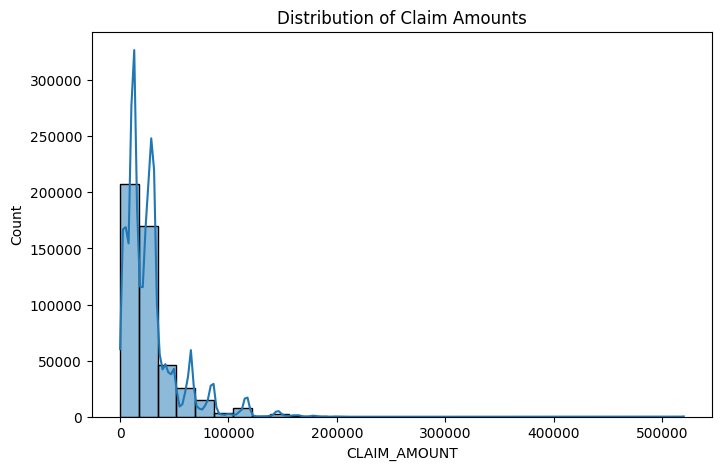

In [36]:
# Distribution of Claim Amounts
plt.figure(figsize=(8,5))
sns.histplot(df['CLAIM_AMOUNT'], kde=True, bins=30)
plt.title('Distribution of Claim Amounts')
plt.show()

**Interpretation:**
This histogram shows the distribution of medical insurance claim amounts. The x-axis represents the claim amounts, while the y-axis shows the count of occurrences for each amount range. The plot indicates that most claim amounts are concentrated in the lower range (under 100,000), with a steep decline as claim amounts increase.

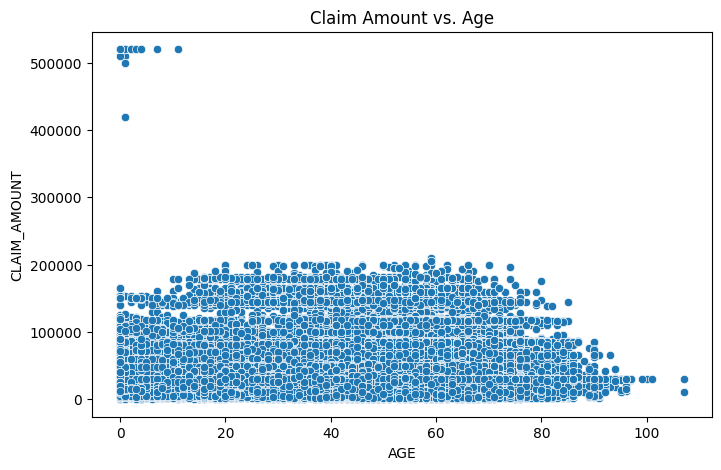

In [37]:
# Relationship between Age and Claim Amount
plt.figure(figsize=(8,5))
sns.scatterplot(x='AGE', y='CLAIM_AMOUNT', data=df)
plt.title('Claim Amount vs. Age')
plt.show()

**Interpretation**: This scatter plot depicts the relationship between age and medical insurance claim amounts.The plot says that claims are spread across a wide range of values, with no clear trend of higher claims for older ages. However, there is a noticeable cluster of higher claim amounts in younger individuals (around age 0-10), and most claims for other age groups stay below approximately 200,000.

In [40]:
# Check for missing values
print(df.isnull().sum())

AGE              0
SEX              0
CATEGORY_NAME    0
PREAUTH_AMT      0
CLAIM_AMOUNT     0
HOSP_TYPE        0
Mortality        0
DAYS_STAYED      3
dtype: int64


In [42]:
df.shape

(479688, 8)

In [43]:
df.columns

Index(['AGE', 'SEX', 'CATEGORY_NAME', 'PREAUTH_AMT', 'CLAIM_AMOUNT',
       'HOSP_TYPE', 'Mortality', 'DAYS_STAYED'],
      dtype='object')

In [ ]:
df.head()

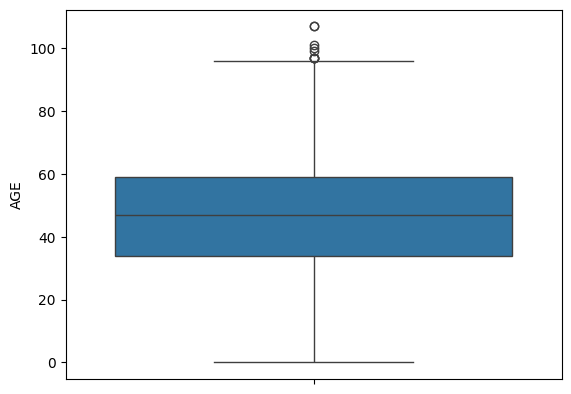

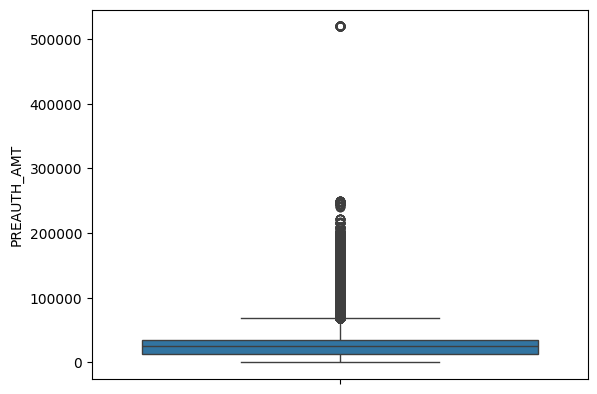

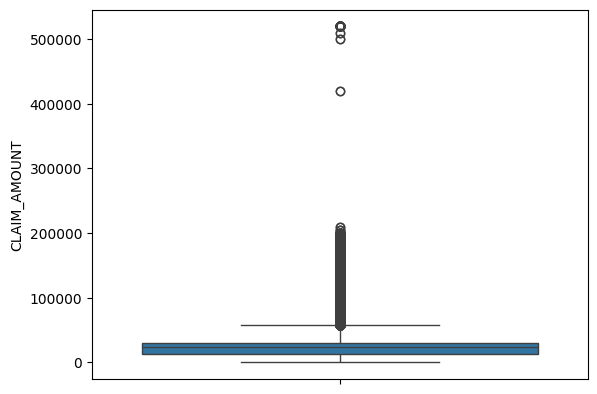

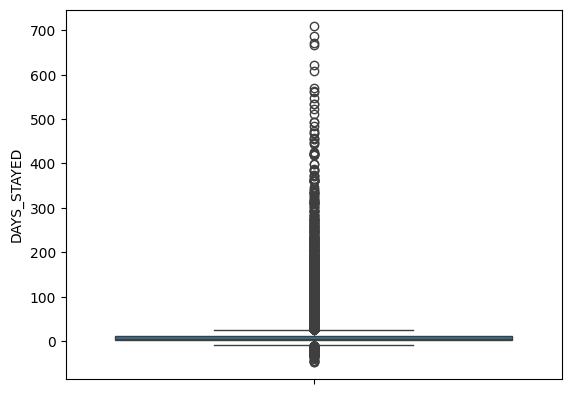

In [44]:
#Outliers
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [45]:
# clipping all the outliers to lower whisker and upper whisker expect for column AGE

for column in df.select_dtypes(include=np.number):
  if column != 'AGE':  # Exclude the 'AGE' column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    df[column] = np.clip(df[column], lower_whisker, upper_whisker)

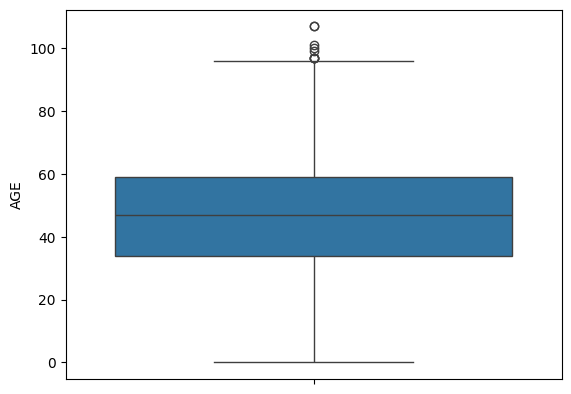

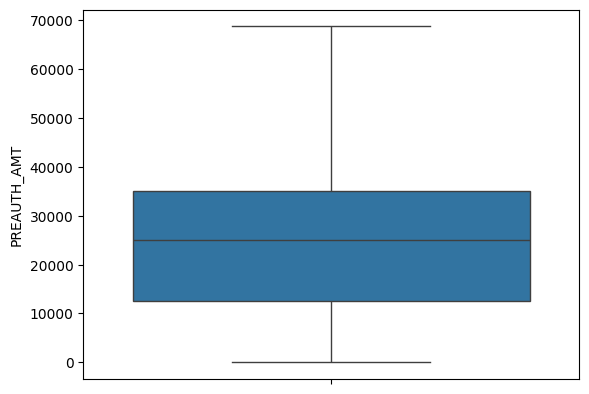

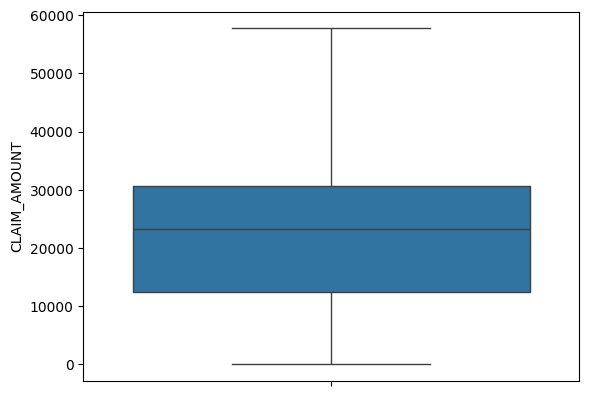

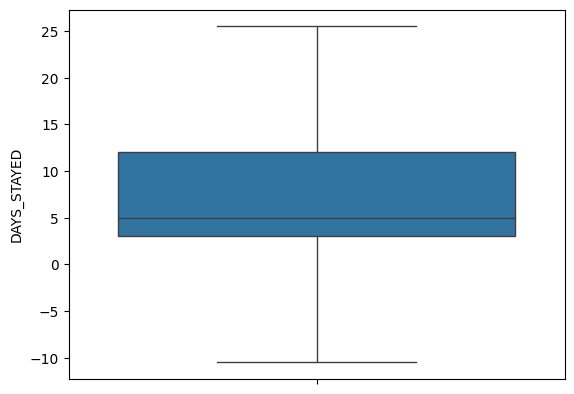

In [46]:
#Outliers
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [47]:

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                   AGE  PREAUTH_AMT  CLAIM_AMOUNT
AGE           1.000000     0.013485      0.032526
PREAUTH_AMT   0.013485     1.000000      0.959587
CLAIM_AMOUNT  0.032526     0.959587      1.000000


In [48]:
num=df.select_dtypes(include=np.number)
num.drop('CLAIM_AMOUNT', axis=1, inplace=True)
num.head()

,AGE,PREAUTH_AMT,DAYS_STAYED
0,56,12500,25.5
1,37,12500,25.5
2,50,12500,25.5
3,45,12500,25.5
4,54,12500,25.5


In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Replace infinite values with large finite values
for column in num.columns:
    num[column] = num[column].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
    num[column] = num[column].fillna(num[column].mean())         # Replace NaN with mean

num = sm.add_constant(num)

# Calculate VIF for each feature
vif_data = []
for i in range(num.shape[1]):
    vif = variance_inflation_factor(num.values, i)
    vif_data.append([num.columns[i], vif])

# Create a DataFrame for VIF values
vif_df = pd.DataFrame(vif_data, columns=['feature', 'VIF_Value'])

# Sort and display the VIF values
print(vif_df.sort_values('VIF_Value', ascending=False))

       feature  VIF_Value
0        const   9.734716
3  DAYS_STAYED   1.006424
2  PREAUTH_AMT   1.004559
1          AGE   1.001880


The variance inflation factor (VIF) is a measure of multicollinearity, or the correlation between multiple independent variables in a regression model.
  DAYS_STAYED, PREAUTH_AMT, and AGE all have VIF values close to 1, meaning there is almost no multicollinearity among these independent variables. VIF values below 5 generally indicate no multicollinearity concerns,which is good for regression analysis.

# Scaling

In [50]:
df_numeric.skew()

,0
AGE,-0.574233
PREAUTH_AMT,2.826157
CLAIM_AMOUNT,3.089832
DAYS_STAYED,6.69312


In [51]:
df_num=df.select_dtypes(include=np.number)

In [52]:
df_num.head()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED
0,56,12500,11000,25.5
1,37,12500,11000,25.5
2,50,12500,11500,25.5
3,45,12500,11000,25.5
4,54,12500,11000,25.5


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
mm=MinMaxScaler()
scaler=mm.fit_transform(df_num)
df_scaled=pd.DataFrame(scaler,columns=df_num.columns)
df_scaled.head()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED
0,0.523364,0.181759,0.190448,1.0
1,0.345794,0.181759,0.190448,1.0
2,0.467290,0.181759,0.199106,1.0
3,0.420561,0.181759,0.190448,1.0
4,0.504673,0.181759,0.190448,1.0


Min-Max scaling is just one of several scaling methods, and the choice of scaler depends on the characteristics of data and the requirements of machine learning model.

# Encoding

In [55]:
cat_col=df.select_dtypes(include=object)
cat_col.head()

,SEX,CATEGORY_NAME,HOSP_TYPE,Mortality
0,FEMALE,NEPHROLOGY,G,NO
1,MALE,NEPHROLOGY,G,NO
2,MALE,NEPHROLOGY,G,NO
3,MALE,NEPHROLOGY,G,NO
4,MALE,NEPHROLOGY,G,NO


In [56]:
df['CATEGORY_NAME'].unique()

array(['NEPHROLOGY', 'CARDIAC AND CARDIOTHORACIC SURGERY', 'CARDIOLOGY',
       'COCHLEAR IMPLANT SURGERY', 'ORTHOPEDIC  SURGERY AND PROCEDURES',
       'MEDICAL ONCOLOGY', 'PEDIATRICS',
       'GYNAECOLOGY AND OBSTETRICS  SURGERY', 'RADIATION ONCOLOGY',
       'GENITO URINARY SURGERIES', 'NEUROLOGY', 'POLY TRAUMA',
       'NEUROSURGERY', 'RHEUMATOLOGY', 'GENERAL SURGERY',
       'GASTROENTEROLOGY', 'PLASTIC SURGERY', 'OPHTHALMOLOGY  SURGERY',
       'PULMONOLOGY', 'GENERAL MEDICINE', 'CRITICAL CARE', 'ENT  SURGERY',
       'ENDOCRINOLOGY', 'SURGICAL ONCOLOGY', 'PEDIATRIC SURGERIES',
       'SURGICAL GASTRO ENTEROLOGY', 'DERMATOLOGY', 'PROSTHESES',
       'INFECTIOUS DISEASES'], dtype=object)

In [57]:
df_target=np.log(df['CLAIM_AMOUNT'])

In [58]:
def cat_boost(cat_input,target):
    catboost=ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input,target)
    df_encode=round(catboost.transform(cat_input),2)

    return df_encode

In [59]:
df_num=df.select_dtypes(exclude=object)
df_num.head(20)

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,DAYS_STAYED
0,56,12500,11000,25.5
1,37,12500,11000,25.5
2,50,12500,11500,25.5
3,45,12500,11000,25.5
4,54,12500,11000,25.5
5,35,12500,11000,25.5
6,52,12500,11000,25.5
7,73,12500,5000,21.0
8,56,40000,40000,6.0
9,49,68750,57750,14.0


In [60]:
df.head()

,AGE,SEX,CATEGORY_NAME,PREAUTH_AMT,CLAIM_AMOUNT,HOSP_TYPE,Mortality,DAYS_STAYED
0,56,FEMALE,NEPHROLOGY,12500,11000,G,NO,25.5
1,37,MALE,NEPHROLOGY,12500,11000,G,NO,25.5
2,50,MALE,NEPHROLOGY,12500,11500,G,NO,25.5
3,45,MALE,NEPHROLOGY,12500,11000,G,NO,25.5
4,54,MALE,NEPHROLOGY,12500,11000,G,NO,25.5


In [61]:
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the specified columns and apply label encoding
for column in ['SEX', 'HOSP_TYPE', 'Mortality','CATEGORY_NAME']:
  df[column] = le.fit_transform(df[column])

# Print the updated DataFrame with label encoded columns
print(df.head(10))

   AGE  SEX  CATEGORY_NAME  PREAUTH_AMT  CLAIM_AMOUNT  HOSP_TYPE  Mortality  \
0   56    0             14        12500         11000          1          0   
1   37    1             14        12500         11000          1          0   
2   50    1             14        12500         11500          1          0   
3   45    1             14        12500         11000          1          0   
4   54    1             14        12500         11000          1          0   
5   35    1             14        12500         11000          1          0   
6   52    1             14        12500         11000          1          0   
7   73    1             14        12500          5000          0          1   
8   56    1              0        40000         40000          0          0   
9   49    1              0        68750         57750          0          0   

   DAYS_STAYED  
0         25.5  
1         25.5  
2         25.5  
3         25.5  
4         25.5  
5         25.5  
6         2

In [62]:
df['CATEGORY_NAME'].unique()

array([14,  0,  1,  2, 18, 13, 20, 11, 25, 10, 15, 22, 16, 26,  9,  7, 21,
       17, 24,  8,  3,  6,  5, 28, 19, 27,  4, 23, 12])

In [63]:
df.dtypes

,0
AGE,int64
SEX,int64
CATEGORY_NAME,int64
PREAUTH_AMT,int64
CLAIM_AMOUNT,int64
HOSP_TYPE,int64
Mortality,int64
DAYS_STAYED,float64


In [65]:
df.head(50)

,AGE,SEX,CATEGORY_NAME,PREAUTH_AMT,CLAIM_AMOUNT,HOSP_TYPE,Mortality,DAYS_STAYED
0,56,0,14,12500,11000,1,0,25.5
1,37,1,14,12500,11000,1,0,25.5
2,50,1,14,12500,11500,1,0,25.5
3,45,1,14,12500,11000,1,0,25.5
4,54,1,14,12500,11000,1,0,25.5
5,35,1,14,12500,11000,1,0,25.5
6,52,1,14,12500,11000,1,0,25.5
7,73,1,14,12500,5000,0,1,21.0
8,56,1,0,40000,40000,0,0,6.0
9,49,1,0,68750,57750,0,0,14.0


In [64]:
df.shape

(479688, 8)

In [ ]:
len(df['CATEGORY_NAME'].unique())

In [66]:
# Summary statistics
print(df.describe())

                 AGE            SEX  CATEGORY_NAME    PREAUTH_AMT  \
count  479688.000000  479688.000000  479688.000000  479688.000000   
mean       44.912264       0.595794      13.698798   27764.955392   
std        18.961084       0.490738       7.237666   19282.369649   
min         0.000000       0.000000       0.000000       5.000000   
25%        34.000000       0.000000      10.000000   12500.000000   
50%        47.000000       1.000000      14.000000   25000.000000   
75%        59.000000       1.000000      20.000000   35000.000000   
max       107.000000       1.000000      28.000000   68750.000000   

        CLAIM_AMOUNT      HOSP_TYPE      Mortality    DAYS_STAYED  
count  479688.000000  479688.000000  479688.000000  479685.000000  
mean    24495.968871       0.230029       0.021101       8.738744  
std     16609.739091       0.420851       0.143722       8.464484  
min         2.000000       0.000000       0.000000     -10.500000  
25%     12500.000000       0.000000   

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   AGE            479688 non-null  int64  
 1   SEX            479688 non-null  int64  
 2   CATEGORY_NAME  479688 non-null  int64  
 3   PREAUTH_AMT    479688 non-null  int64  
 4   CLAIM_AMOUNT   479688 non-null  int64  
 5   HOSP_TYPE      479688 non-null  int64  
 6   Mortality      479688 non-null  int64  
 7   DAYS_STAYED    479685 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 29.3 MB


In [67]:
df.dtypes

,0
AGE,int64
SEX,int64
CATEGORY_NAME,int64
PREAUTH_AMT,int64
CLAIM_AMOUNT,int64
HOSP_TYPE,int64
Mortality,int64
DAYS_STAYED,float64


In [69]:
df.isna().sum()

,0
AGE,0
SEX,0
CATEGORY_NAME,0
PREAUTH_AMT,0
CLAIM_AMOUNT,0
HOSP_TYPE,0
Mortality,0
DAYS_STAYED,3


In [70]:
# Drop rows with null values in the 'DAYS_STAYED' column
df.dropna(subset=['DAYS_STAYED'], inplace=True)

In [71]:
df.isna().sum()

,0
AGE,0
SEX,0
CATEGORY_NAME,0
PREAUTH_AMT,0
CLAIM_AMOUNT,0
HOSP_TYPE,0
Mortality,0
DAYS_STAYED,0


# MODEL TRAINING

In [72]:
# Defining features (X) and target variable (y)
X = df.drop(columns=['CLAIM_AMOUNT'])
y = df['CLAIM_AMOUNT']

# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(383748, 7)
(383748,)
(95937, 7)
(95937,)


In [74]:
X

,AGE,SEX,CATEGORY_NAME,PREAUTH_AMT,HOSP_TYPE,Mortality,DAYS_STAYED
0,56,0,14,12500,1,0,25.5
1,37,1,14,12500,1,0,25.5
2,50,1,14,12500,1,0,25.5
3,45,1,14,12500,1,0,25.5
4,54,1,14,12500,1,0,25.5
...,...,...,...,...,...,...,...
479683,22,0,11,24910,0,0,1.0
479684,60,1,13,45910,0,0,1.0
479685,38,1,22,30000,0,0,0.0
479686,59,1,17,23020,0,0,0.0


In [75]:
df.head()

,AGE,SEX,CATEGORY_NAME,PREAUTH_AMT,CLAIM_AMOUNT,HOSP_TYPE,Mortality,DAYS_STAYED
0,56,0,14,12500,11000,1,0,25.5
1,37,1,14,12500,11000,1,0,25.5
2,50,1,14,12500,11500,1,0,25.5
3,45,1,14,12500,11000,1,0,25.5
4,54,1,14,12500,11000,1,0,25.5


In [76]:
y_train.isna().sum()

0

In [77]:
y_train

,CLAIM_AMOUNT
5566,6250
251196,30000
354086,30769
115773,31030
179878,30000
...,...
259181,9180
365841,25000
131934,57750
146869,12000


# Linear Regression Model

In [78]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression R2 Score: {r2_lr}")

Linear Regression RMSE: 5044.154064025376
Linear Regression MAE: 3001.271352302095
Linear Regression R2 Score: 0.9083424691033357


RMSE (5044.15): This value might be considered high depending on this context of problem. It indicates that the average prediction error is around 5044 units.

MAE (3001.27): Similar to RMSE, this value is relatively high, suggesting a significant average difference between predictions and actual values.

R² Score (0.9083): This is a relatively high value, indicating that approximately 90.83% of the variance in the dependent variable is explained by the model.

In [80]:
#USE LR MODEL TAKE INPUT FROM USER AND PREDICT

def predict_claim_amount():
  """Takes user input and predicts the claim amount using the trained linear regression model."""

  # Get user input for features
  age = int(input("Enter age: "))
  sex = int(input("Enter sex (0 for FEMALE, 1 for MALE): "))
  hosp_type = int(input("Enter hospital type (0 for 'GOVERNMENT', 1 for 'PRIVATE'): "))
  preauth_amt = float(input("Enter pre-authorization amount: "))
  days_stayed = int(input("Enter number of days stayed: "))
  mortality = int(input("Enter mortality (0 for 'NO', 1 for 'YES'): "))
  category_name = int(input("Enter category name (0-11): "))

  # Create a DataFrame with user input, ensuring column names and order match the training data
  user_input = pd.DataFrame({
      'AGE': [age],
      'SEX': [sex],
      'HOSP_TYPE': [hosp_type],
      'PREAUTH_AMT': [preauth_amt],
      'DAYS_STAYED': [days_stayed],
      'Mortality': [mortality],
      'CATEGORY_NAME': [category_name]
  }, columns=X_train.columns) # Use X_train.columns to get the correct order of features


  # Make prediction using the loaded linear regression model
  predicted_claim_amount = lr_model.predict(user_input)[0]

  print(f"Predicted Claim Amount: {predicted_claim_amount}")


# Assuming 'lr_model' is your trained linear regression model
# Call the function to get user input and make a prediction
predict_claim_amount()

Enter age: 45
Enter sex (0 for FEMALE, 1 for MALE): 0
Enter hospital type (0 for 'GOVERNMENT', 1 for 'PRIVATE'): 1
Enter pre-authorization amount: 15000
Enter number of days stayed: 12
Enter mortality (0 for 'NO', 1 for 'YES'): 0
Enter category name (0-11): 5
Predicted Claim Amount: 12635.76304724909


In [81]:
!pip install google-colab
from google.colab import files
import pickle # Import the pickle module

# Assuming 'lr_model' is your trained Linear Regression model

# Specify the file path where you want to save the model
filename = 'lr_trained_model.pkl'

# Save the model to a pickle file
pickle.dump(lr_model, open(filename, 'wb'))

# Download the file to your local machine
files.download(filename) # Now files is defined and this line should work

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Random Forest Regressor

In [82]:
# Fit the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [83]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R2 Score: {r2_rf}")

Random Forest RMSE: 4275.847071381845
Random Forest MAE: 1909.8624264860027
Random Forest R2 Score: 0.9341378662953144


In [85]:
# Function to get user input and make predictions
def predict_claim_amount():
    """Gets user input for features and predicts claim amount using the trained model."""

    print("Please enter the following information:")

    sex = int(input("Sex (0 for Female, 1 for Male): "))
    hosp_type = int(input("Hospital Type (0 for Government, 1 for Private): "))
    mortality = int(input("Mortality (0 for No, 1 for Yes): "))
    category_name = int(input("Surgery Category Name (Enter an integer between 0 and 17): "))
    age = int(input("Age: "))
    preauth_amt = float(input("Pre-authorization Amount: "))
    days_stayed = int(input("Days Stayed: "))

    # Create a DataFrame with user input, using the same column names and order as X_train
    user_input = pd.DataFrame([[sex, hosp_type, mortality, category_name, age, preauth_amt, days_stayed]],
                              columns=X_train.columns)  # Use X_train.columns to ensure correct order

    # Make prediction using the trained model
    predicted_claim_amount = rf_model.predict(user_input)[0]

    print(f"\nPredicted Claim Amount: {predicted_claim_amount:.2f}")


# Call the function to start the prediction process
predict_claim_amount()

Please enter the following information:
Sex (0 for Female, 1 for Male): 0
Hospital Type (0 for Government, 1 for Private): 0
Mortality (0 for No, 1 for Yes): 0
Surgery Category Name (Enter an integer between 0 and 17): 1
Age: 25
Pre-authorization Amount: 18000
Days Stayed: 12

Predicted Claim Amount: 2815.58


In [86]:
# download the  rf trained model in pickle format

import pickle

# Assuming 'rf_model' is your trained Random Forest model

# Specify the file path where you want to save the model
filename = 'rf_trained_model.pkl'

# Save the model to a pickle file
pickle.dump(rf_model, open(filename, 'wb'))

# Download the file to your local machine
from google.colab import files
files.download(filename)

KeyboardInterrupt: 